# Lines for SD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp

In [2]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = ratio1*a1
print a1

[  2.55675200e+00   3.48527173e+00   4.46496464e+00   5.60291344e+00
   7.47988568e+00   1.06218469e+01   1.47757723e+01   1.97233327e+01
   2.42409675e+01   3.04176363e+01   3.58761336e+01   4.50238131e+01
   5.42275517e+01   6.66812275e+01   8.03215809e+01   9.47576526e+01
   1.14109211e+02   1.40252538e+02   1.62029921e+02   1.95046710e+02
   2.49773764e+02   3.06941310e+02   3.69555994e+02   4.26988011e+02
   5.35848641e+02   6.45303210e+02   7.93379902e+02   9.16892670e+02
   1.15120800e+03   1.53796188e+03   3.30680595e+03   1.05340691e+04
   3.57050712e+04   1.00462601e+05   2.44554357e+05   1.15414854e+06
   3.99384422e+06   8.32494014e+06]


# Equation of the line

In [3]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return 'y = {}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn


# Boundaries of Height

In [4]:
c1 = Point(2.55675200e+00, 5.97419825e-01)
d1 = Point(4.50238131e+01, 1.63274396e+00)
print(c1.line_equation(d1))

c2 = Point(4.50238131e+01,1.63274396e+00)
d2 = Point(1.14109211e+02,4.09214110e+00)
print(c2.line_equation(d2))

c3 = Point(1.14109211e+02,4.09214110e+00)
d3 = Point(3.69555994e+02,3.73721635e+00)
print(c3.line_equation(d3))

c4 = Point(3.69555994e+02,4.09214110e+00)
d4 = Point(9.16892670e+02,6.98714721e+00)
print(c4.line_equation(d4))

c5 = Point(9.16892670e+02,6.98714721e+00)
d5 = Point(8.32494014e+06, 6.01085228e+06)
print (c5.line_equation(d5))

y = 0.0243794627691x + 0.535087584806
y = 0.0355993772166x + 0.0299242537241
y = -0.00138942736265x + 4.25068756009
y = 0.00528926022491x + 2.13746328006
y = 0.722108181856x - 655.10855168


In [5]:
#def Height1(a1):
    #a1_condlist = [(a1 >= 2.55675200e+00) & (a1 <=4.50238131e+01), (a1 >4.50238131e+01 ) & (a1 <=1.14109211e+02), (a1 >1.14109211e+02 ) & (a1 <3.69555994e+02),(a1 <= 3.69555994e+02) & (a1 >9.16892670e+02),(a1 <=9.16892670e+02 ) & (a1 >=8.32494014e+06) ]
    #a1_funclist = [lambda a1: 0.0243794627691*a1 + 0.535087584806, lambda a1: 0.0355993772166*a1 +  0.0299242537241, lambda a1: (-0.00138942736265)*a1 + 4.25068756009, lambda a1: 0.00528926022491*a1 + 2.13746328006, lambda a1: 0.722108181856*a1 - 655.10855168]
    #Height = np.piecewise(a1, a1_condlist, a1_funclist)
    #return Height

In [6]:
#def functional(x):
    #if ((x >= 2) & (x < 6)):
        #return 2*x
    #elif ((x >= 6) & (x < 10)):
        #return x-3
    #elif (x >= 10):
        #return x/3
    #else:
        #continue
        #return 3*x - 6

# Piecewise Function

In [7]:
def Height(x):
    if ((x >= 2.55675200e+00) & (x <=4.50238131e+01)):
        return 0.0243794627691*x + 0.535087584806
    elif ((x >4.50238131e+01) & (x <=1.14109211e+02)):
        return 0.0355993772166*x + 0.0299242537241
    elif ((x >1.14109211e+02) & (x<3.69555994e+02)):
        return (-0.00138942736265)*x + 4.25068756009
    elif ((x>= 3.69555994e+02) & (x<9.16892670e+02)):
        return 0.00528926022491*x + 2.13746328006
    elif ((x>=9.16892670e+02) & (x<=8.32494014e+06)):
        return 0.722108181856*x - 655.10855168
    else:
        return 3*x

In [8]:
print Height(1.14109211e+02)

4.0921411


In [9]:
def SurfaceDensity(x):
    if ((x >= 2.59665597) & (x <= 4.54629547e+01)):
        return 2599.13153575*x - 1654.64126912
    elif ((x > 4.54629547e+01) & (x <= 9.39664831e+01)):
        return (- 907.093214687)*x + 157748.695728
    elif ((x>=1.18051653e+02) & (x<= 5.59432571e+02)):
        return 1413.70421773*x - 84603.0101555
    elif ((x > 5.59432571e+02) & (x <= 9.20373200e+02)):
        return - 148.699857228*x + 789456.718436
    elif ((x > 9.20373200e+02) & (x <= 8.64842328e+06)):
        return - 0.0754664810715*x + 652666.812327
    else:
        return 3*x

In [10]:
print SurfaceDensity(8.64842328e+06)

0.740568560082


# Density

In [11]:
#Eq. For Surface Density

a1 = Point(2.59665597, 5.09440915e+03)
b1 = Point(4.54629547e+01, 1.16509558e+05)
print(a1.line_equation(b1))

a2 = Point(4.54629547e+01,1.16509558e+05)
b2 = Point(9.39664831e+01,7.25123365e+04)
print(a2.line_equation(b2))

a3 = Point(1.18051653e+02,8.22871096e+04)
b3 = Point(5.59432571e+02,7.06269175e+05)
print(a3.line_equation(b3))

a4 = Point(5.59432571e+02,7.06269175e+05)
b4 = Point(9.20373200e+02,6.52597355e+05)
print(a4.line_equation(b4))

a5 = Point(9.20373200e+02,6.52597355e+05)
b5 = Point(8.64842328e+06, 7.40568469e-01)
print (a5.line_equation(b5))

y = 2599.13153575x - 1654.64126912
y = -907.093214687x + 157748.695728
y = 1413.70421773x - 84603.0101555
y = -148.699857228x + 789456.718436
y = -0.0754664810715x + 652666.812327


In [12]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]
print text_file2.shape

(30, 2)


In [13]:
unlog_sd = 10**text_file2[:,1]
unlog_a2 = 10**a2

In [14]:
def SurfaceDensity1(unlog_a2):
    unlog_a2_condlist = [(unlog_a2 >= 2.59665597) & (unlog_a2 <= 4.54629547e+01), (unlog_a2 > 4.54629547e+01 ) & (unlog_a2 <= 9.39664831e+01), (unlog_a2 >=1.18051653e+02 ) & (unlog_a2 <= 5.59432571e+02),(unlog_a2 >5.59432571e+02 ) & (unlog_a2 <= 9.20373200e+02),(unlog_a2 > 9.20373200e+02 ) & (unlog_a2 <= 8.64842328e+06) ]
    unlog_a2_funclist = [lambda unlog_a2: 2599.13153575*unlog_a2 - 1654.64126912, lambda unlog_a2: - 907.093214687*unlog_a2 + 157748.695728, lambda unlog_a2: 1413.70421773*unlog_a2 - 84603.0101555 , lambda unlog_a2: - 148.699857228*unlog_a2 + 789456.718436, lambda unlog_a2: - 0.0754664810715*unlog_a2 + 652666.812327]
    Surface_Density = np.piecewise(unlog_a2, unlog_a2_condlist, unlog_a2_funclist)
    return Surface_Density

In [15]:
print SurfaceDensity(2.59665597)/Height(2.59665597), SurfaceDensity(4.54629547e+01)/Height(4.54629547e+01)
print SurfaceDensity(4.54629547e+01)/Height(4.54629547e+01), SurfaceDensity(9.39664831e+01)/Height(9.39664831e+01)
print SurfaceDensity(1.18051653e+02)/Height(1.18051653e+02), SurfaceDensity(5.59432571e+02)/Height(5.59432571e+02)
print SurfaceDensity(5.59432571e+02)/Height(5.59432571e+02), SurfaceDensity(9.20373200e+02)/Height(9.20373200e+02)
print SurfaceDensity(9.20373200e+02)/Height(9.20373200e+02), SurfaceDensity(8.64842328e+06)/Height(8.64842328e+06)

8513.4886681 70681.3726412
70681.3726412 21484.6750187
20135.5243354 138580.676762
138580.676762 68691.0860431
68691.0860431 2.85434903799e-08


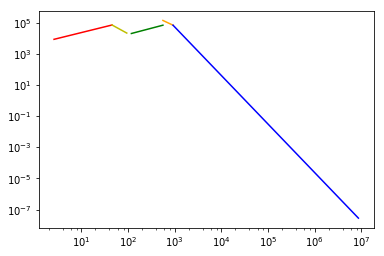

In [16]:
logPlot=plt.gca()
logPlot.loglog([2.59665597,4.54629547e+01], [8513.4886681,70681.3726412], c='r')
logPlot.loglog([4.54629547e+01,9.39664831e+01], [70681.3726412,21484.6750187], c='y')
logPlot.loglog([1.18051653e+02,5.59432571e+02], [20135.5243354,68691.0860431], c='g')
logPlot.loglog([5.59432571e+02,9.20373200e+02],[138580.676762,68691.0860431], color='orange')
logPlot.loglog([9.20373200e+02,8.64842328e+06],[68691.0860431, 2.85434903799e-08], c='b')

In [17]:
Distance_d = [2.59665597,4.54629547e+01,9.39664831e+01,1.18051653e+02,5.59432571e+02,9.20373200e+02,8.64842328e+06]
Density_d = [8513.4886681,70681.3726412,21484.6750187,20135.5243354,68691.0860431,138580.676762,2.85434903799e-08]

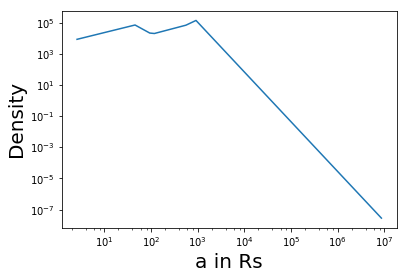

In [18]:
logPlot = plt.gca()
logPlot.loglog(Distance_d,Density_d)
plt.xlabel('a in Rs',fontsize=20)
plt.ylabel('Density',fontsize=20)

In [19]:
print unlog_a2  

[  2.59665597e+00   3.77204249e+00   6.60419396e+00   1.51418933e+01
   3.00246171e+01   3.77204249e+01   4.54629547e+01   5.71158648e+01
   6.60419396e+01   7.63629826e+01   9.39664831e+01   1.18051653e+02
   1.45265393e+02   1.75082703e+02   2.11020343e+02   2.65108360e+02
   3.40041193e+02   4.54629547e+02   5.59432571e+02   7.25037318e+02
   9.20373200e+02   1.48310251e+03   3.61874981e+03   1.13254132e+04
   3.85110700e+04   1.23052400e+05   3.19524751e+05   1.15628013e+06
   3.19524751e+06   8.64842328e+06]


In [20]:
a_init = text_file1[:30,0]
ratio_init = text_file1[:30,1]
unlog_ratio = 10**ratio_init
unlog_a = 10**a_init
height_ = unlog_ratio*unlog_a
D = unlog_sd/height_

In [21]:
c = 6.67e-11*2*1.99e30*10**8
c_sq = (3e8)**2
meters = c/c_sq

In [22]:
print Height(2.59665597)*meters, Height(4.54629547e+01)*meters
print Height(4.54629547e+01)*meters, Height(9.39664831e+01)*meters
print Height(1.18051653e+02)*meters, Height(5.59432571e+02)*meters
print Height(5.59432571e+02)*meters, Height(9.20373200e+02)*meters
print Height(9.20373200e+02)*meters, Height(8.64842328e+06)*meters

1.76503229448e+11 4.86208980579e+11
4.86208980579e+11 9.95518893999e+11
1.20541130709e+12 1.50325954681e+12
1.50325954681e+12 2.80227868178e+12
2.80227868178e+12 7.65287444816e+18


# Data for t grind

In [34]:
print SurfaceDensity(1.30051044e+04)/(Height(1.30051044e+04)*meters)
print SurfaceDensity(9.61790620e+05)/(Height(9.61790620e+05)*meters)
print SurfaceDensity(3.27405712e+07)/(Height(3.27405712e+07)*meters)

2.52906361193e-12
2.83433661044e-14
3.39026466666e-14


In [24]:
print SurfaceDensity(2.59665597)/(1.76503229448e+13), SurfaceDensity(4.54629547e+01)/(4.86208980579e+13)
print SurfaceDensity(4.54629547e+01)/(4.86208980579e+13), SurfaceDensity(9.39664831e+01)/(9.95518893999e+13)
print SurfaceDensity(1.18051653e+02)/(1.20541130709e+14), SurfaceDensity(5.59432571e+02)/(1.50325954681e+12)
print SurfaceDensity(5.59432571e+02)/(1.50325954681e+12), SurfaceDensity(9.20373200e+02)/(2.80227868178e+14)
print SurfaceDensity(9.20373200e+02)/(2.80227868178e+14), SurfaceDensity(8.64842328e+06)/(7.65287444816e+20)

2.88629798216e-10 2.39628560257e-09
2.39628560257e-09 7.28387345907e-10
6.82647566989e-10 4.69825171908e-07
4.69825171908e-07 2.32880961927e-09
2.32880961927e-09 9.67699868983e-22


In [25]:
c = 6.67e-11*2*1.99e30*10**8
c_sq = (3e8)**2
meters = (c/c_sq)*100
print meters

2.94962222222e+13


In [26]:
d_rg = [2.59665597*meters/(1.5e+11),4.54629547e+01*meters/(1.5e+11),9.39664831e+01*meters/(1.5e+11),1.18051653e+02*meters/(1.5e+11),5.59432571e+02*meters/(1.5e+11),9.20373200e+02*meters/(1.5e+11),8.64842328e+06*meters/(1.5e+11)]
print d_rg

[510.6102768385333, 8939.902764733482, 18477.708446388595, 23213.85193725778, 110007.64955043409, 180983.54956385188, 1700638766.2581332]


In [27]:
distance_rg = np.array([5.106102768385334, 89.39902764733482, 184.77708446388593, 232.13851937257778, 1100.0764955043408, 1809.8354956385185, 17006387.662581332])

In [28]:
adj_density = np.array ([2.88629798216e-08,2.39628560257e-07, 7.28387345907e-08,6.82647566989e-08,4.69825171908e-07,2.32880961927e-07, 9.67699868983e-20])

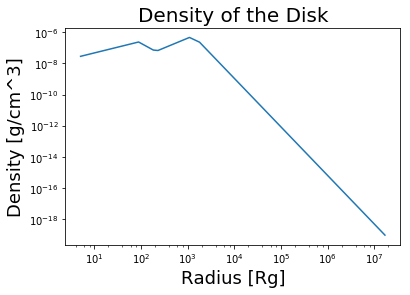

In [29]:
logPlot = plt.gca()
logPlot.loglog(distance_rg,adj_density)
plt.xlabel('Radius [Rg]',fontsize=18)
plt.ylabel('Density [g/cm^3]',fontsize=18)
plt.savefig('Density.png', dpi=300, bbox_inches='tight')
plt.title('Density of the Disk', fontsize=20)